# Linear Regression

1. Import the necessary libraries.
2. [Using synthetic data] Generate 100 data points (samples) randomly:
    * X values are generated according to uniform distribution within range [-10, 10].
    * Y values are generated according to the following equation (0.5x + 1 + random Gaussian noise).
    * Y values are linearly correlated to X values.  
3. Plot the data.
4. Create the linear regression model.
    * Number of features = D = 1
    * Number of outputs = K = 1
5. Specify the loss function and the optimization algorithm.  
    * Loss function is Mean Square Error (MSE).
    * Optimization Algorithm is Stochastic Gradient Descent (SGD).
6. Reshape the data points to be in form (# samples x # dimensions).
7. Convert the data points to be in Torch tensors.
8. Display the data type of inputs and targets.
9. Fit the model with 100 epochs.
    * Specify the number of epochs to 100.
    * For each epoch:
      - Reset the parameter gradients to avoid gradients accumulation.
      - Perform the Forward pass.
      - Collect the losses in a list to be graphed later.
      - Perform the Backward pass.
      - Display the loss per epoch
    * Plot the loss per epoch.
10. Plot the graph (points with the fitted line).
11. Display the weight (slope) and the bias (y-intercept) of the trained model.
12. Make some predictions, when input is -10, -5, 0, 5, 10.

In [1]:
# 1. import the necessary libraries.

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2. [Using synthetic data] Generate 100 data points (samples) randomly.

N = 100
X = np.random.random(N) * 20 - 10
Y = 0.5 * X - 1 + np.random.randn(N)

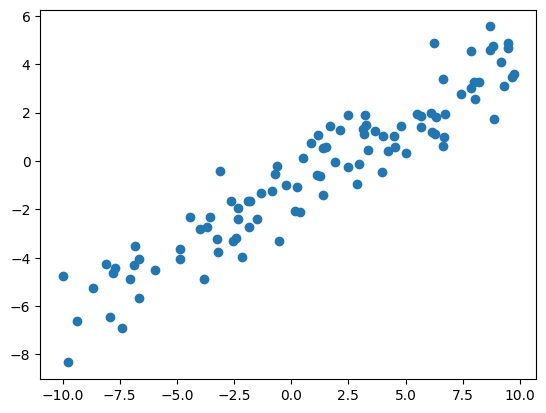

In [3]:
# 3. Plot the data

plt.scatter(X, Y);

In [4]:
# 4. Create the linear regression model.

D, K = 1, 1

model = nn.Linear(D, K)

In [5]:
# 5. Specify the loss function and the optimization algorithm.

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [6]:
# 6. Reshape the data points to be in form (# samples x # dimensions).

X = X.reshape(N, D)
Y = Y.reshape(N, K)

In [7]:
# 7. Convert the data points to be in Torch tensors.

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [8]:
# 8. Display the data type of inputs and targets.

print(type(inputs))
print(type(targets))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [9]:
# 9. Fit the model.

epochs = 100
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, targets)

  losses.append(loss.item())

  loss.backward()
  optimizer.step()

  print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 26.1919
Epoch 2/100, Loss: 7.3701
Epoch 3/100, Loss: 4.5010
Epoch 4/100, Loss: 3.9823
Epoch 5/100, Loss: 3.8130
Epoch 6/100, Loss: 3.6985
Epoch 7/100, Loss: 3.5956
Epoch 8/100, Loss: 3.4977
Epoch 9/100, Loss: 3.4036
Epoch 10/100, Loss: 3.3131
Epoch 11/100, Loss: 3.2260
Epoch 12/100, Loss: 3.1423
Epoch 13/100, Loss: 3.0617
Epoch 14/100, Loss: 2.9842
Epoch 15/100, Loss: 2.9097
Epoch 16/100, Loss: 2.8380
Epoch 17/100, Loss: 2.7690
Epoch 18/100, Loss: 2.7026
Epoch 19/100, Loss: 2.6388
Epoch 20/100, Loss: 2.5773
Epoch 21/100, Loss: 2.5182
Epoch 22/100, Loss: 2.4614
Epoch 23/100, Loss: 2.4067
Epoch 24/100, Loss: 2.3541
Epoch 25/100, Loss: 2.3035
Epoch 26/100, Loss: 2.2548
Epoch 27/100, Loss: 2.2080
Epoch 28/100, Loss: 2.1629
Epoch 29/100, Loss: 2.1196
Epoch 30/100, Loss: 2.0779
Epoch 31/100, Loss: 2.0378
Epoch 32/100, Loss: 1.9992
Epoch 33/100, Loss: 1.9621
Epoch 34/100, Loss: 1.9264
Epoch 35/100, Loss: 1.8920
Epoch 36/100, Loss: 1.8590
Epoch 37/100, Loss: 1.8272
Epoch 38/

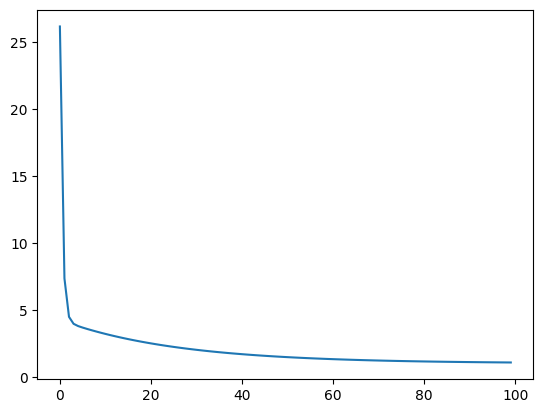

In [10]:
# Plot the loss per epoch.

plt.plot(losses);

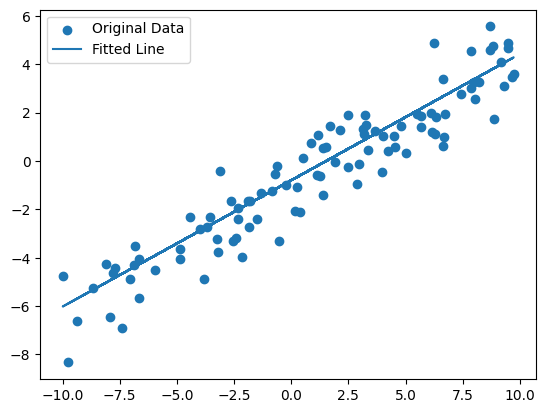

In [11]:
# 10. Plot the graph (points with the fitted line).

plt.scatter(X, Y, label = 'Original Data')

predicted = model(inputs).detach().numpy()
plt.plot(X, predicted, label = 'Fitted Line')
plt.legend()
plt.show()

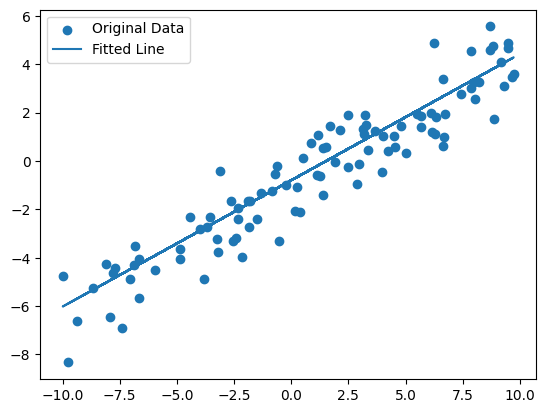

In [12]:
# [Another Solution] 10. Plot the graph (points with the fitted line).

plt.scatter(X, Y, label = 'Original Data')

with torch.no_grad():
  predicted = model(inputs).numpy()
plt.plot(X, predicted, label = 'Fitted Line')
plt.legend()
plt.show()

In [13]:
# 11. Display the weight (slope) and the bias (y-intercept) of the trained model.

w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.52229387]] [-0.79992855]


In [14]:
# 12. Make some predictions, when inputs are -10, -5, 0, 5, and 10.

x = torch.asarray([-10, -5, 0, 5, 10], dtype = torch.float32).reshape(-1, 1)
print(x)
predicted = model(x).detach()
print(predicted)

tensor([[-10.],
        [ -5.],
        [  0.],
        [  5.],
        [ 10.]])
tensor([[-6.0229],
        [-3.4114],
        [-0.7999],
        [ 1.8115],
        [ 4.4230]])
